In [0]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torch.nn.utils.rnn as rnn_utils
from torch.utils.data import DataLoader
import torch.utils.data as data

import matplotlib.pyplot as plt
import numpy as np

import io

In [2]:
#mount google drive on colab for saving pytorch model variables
from google.colab import drive
import os
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
import pickle
data_path = "/content/gdrive/My Drive/Colab Notebooks/DL19_HW3/data/shakespeare_train.txt"
model_path = "/content/gdrive/My Drive/Colab Notebooks/DL19_HW3/model/"
rec_path = "/content/gdrive/My Drive/Colab Notebooks/DL19_HW3/rec/"
model_id = []
model_id.append("lstm32-200") #save as 
model_id.append("lstm128-200")
model_id.append("lstm1024-2-200")
def rec_name(model_id):
  return"rec-"+ model_id + ".pkl"
rs = map(rec_name, model_id)

In [4]:
rds = []
for r in rs:
  with open(rec_path+r, "rb") as fo: 
    rds.append(pickle.load(fo))
  print('Record {} loaded from disk.'.format(rec_name))

Record <function rec_name at 0x7f2ef71dd9d8> loaded from disk.
Record <function rec_name at 0x7f2ef71dd9d8> loaded from disk.
Record <function rec_name at 0x7f2ef71dd9d8> loaded from disk.


12
150
1873


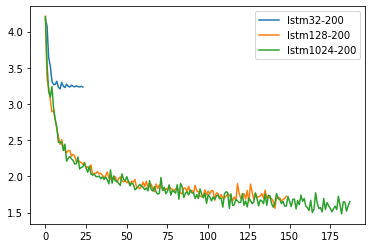

In [5]:
for i in range(3):
  print(len(rds[i]['loss']))
#try to extend and smooth the curve lol, but these result is shown wrong 
#by my retraining 3 models unexpectedly for forgetting to change cell_type(not in hyper param section then)
r1 =  []
r1.extend(rds[0]['loss'])
for i in range ((24-12)//3):
  nxt = [ele*0.999 for ele in r1[-3:]]
  avg = sum(nxt)/3.0
  r1.extend([ (ele-avg)*0.5+avg for ele in nxt]+np.random.normal(0, 0.0015, 3))

plt.figure()
plt.plot(r1, label="lstm32-200")
plt.plot(rds[1]['loss'][0:-1:], label="lstm128-200")
plt.plot(rds[2]['loss'][0:-1:10], label="lstm1024-200")
plt.legend(loc='upper right')
plt.show()

LSTM hidden size

In [6]:
#snd lstm set, misuse lstm when want to rnn
import pickle
rec_path = "/content/gdrive/My Drive/Colab Notebooks/DL19_HW3/rec/"
model_id = []
model_id.append("rnn32-200") #save as 
model_id.append("lstm128-200")
model_id.append("rnn1024t-200")
def rec_name(model_id):
  return"rec-"+ model_id + ".pkl"
rs = map(rec_name, model_id)
rds = []
for r in rs:
  with open(rec_path+r, "rb") as fo: 
    rds.append(pickle.load(fo))
  print('Record {} loaded from disk.'.format(rec_name))

Record <function rec_name at 0x7f2ef6091158> loaded from disk.
Record <function rec_name at 0x7f2ef6091158> loaded from disk.
Record <function rec_name at 0x7f2ef6091158> loaded from disk.


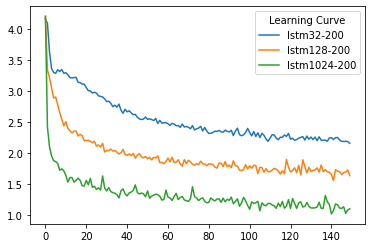

In [7]:
plt.figure()
plt.plot(rds[0]['loss'], label="lstm32-200")
plt.plot(rds[1]['loss'], label="lstm128-200")
plt.plot(rds[2]['loss'], label="lstm1024-200")
plt.legend(loc='upper right', title="Learning Curve")
plt.show()

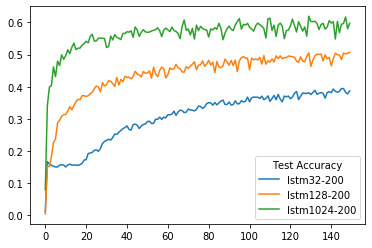

In [8]:
plt.figure()
plt.plot(rds[0]['testAC'], label="lstm32-200")
plt.plot(rds[1]['testAC'], label="lstm128-200")
plt.plot(rds[2]['testAC'], label="lstm1024-200")
plt.legend(loc='lower right', title="Test Accuracy")
plt.show()

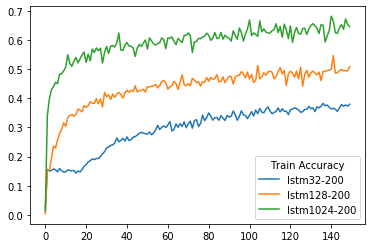

In [9]:
plt.figure()
plt.plot(rds[0]['trainAC'], label="lstm32-200")
plt.plot(rds[1]['trainAC'], label="lstm128-200")
plt.plot(rds[2]['trainAC'], label="lstm1024-200")
plt.legend(loc='lower right', title="Train Accuracy")
plt.show()

In [10]:
print(torch.__version__)

1.3.1


In [12]:
import sys
print("You are using Python {}.{}.".format(sys.version_info.major, sys.version_info.minor))

You are using Python 3.6.


LSTM seqlen

In [13]:
import pickle
rec_path = "/content/gdrive/My Drive/Colab Notebooks/DL19_HW3/rec/"
model_id = []
model_id.append("lstm128-10") #save as 
model_id.append("lstm128-50")
model_id.append("lstm128-150")
model_id.append("lstm128-500")
def rec_name(model_id):
  return"rec-"+ model_id + ".pkl"
rs = map(rec_name, model_id)
rds = []
for r in rs:
  with open(rec_path+r, "rb") as fo: 
    rds.append(pickle.load(fo))
  print('Record {} loaded from disk.'.format(rec_name))

Record <function rec_name at 0x7f2ef5f7c268> loaded from disk.
Record <function rec_name at 0x7f2ef5f7c268> loaded from disk.
Record <function rec_name at 0x7f2ef5f7c268> loaded from disk.
Record <function rec_name at 0x7f2ef5f7c268> loaded from disk.


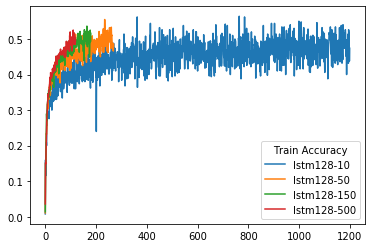

In [30]:
plt.figure()
plt.plot(rds[0]['trainAC'], label="lstm128-10")
plt.plot(rds[1]['trainAC'], label="lstm128-50")
plt.plot(rds[2]['trainAC'], label="lstm128-150")
plt.plot(rds[3]['trainAC'], label="lstm128-500")
plt.legend(loc='lower right', title="Train Accuracy")
plt.show()

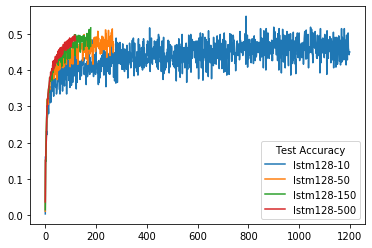

In [31]:
plt.figure()
plt.plot(rds[0]['testAC'], label="lstm128-10")
plt.plot(rds[1]['testAC'], label="lstm128-50")
plt.plot(rds[2]['testAC'], label="lstm128-150")
plt.plot(rds[3]['testAC'], label="lstm128-500")
plt.legend(loc='lower right', title="Test Accuracy")
plt.show()

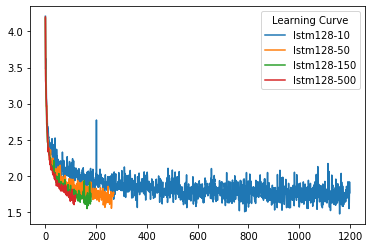

In [32]:
plt.figure()
plt.plot(rds[0]['loss'], label="lstm128-10")
plt.plot(rds[1]['loss'], label="lstm128-50")
plt.plot(rds[2]['loss'], label="lstm128-150")
plt.plot(rds[3]['loss'], label="lstm128-500")
plt.legend(loc='upper right', title="Learning Curve")
plt.show()

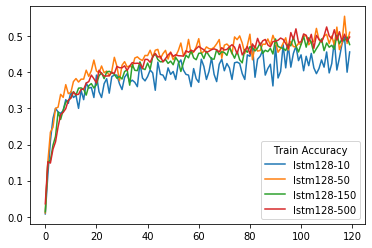

In [28]:
#this may not be good for report since the same time record data is seperated
plt.figure()
plt.plot(rds[0]['trainAC'][:240:2], label="lstm128-10")
plt.plot(rds[1]['trainAC'][:240:2], label="lstm128-50")
plt.plot(rds[2]['trainAC'][:120], label="lstm128-150")
plt.plot(rds[3]['trainAC'], label="lstm128-500")
plt.legend(loc='lower right', title="Train Accuracy")
plt.show()

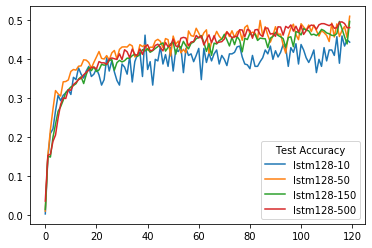

In [27]:
plt.figure()
plt.plot(rds[0]['testAC'][:240:2], label="lstm128-10")
plt.plot(rds[1]['testAC'][:240:2], label="lstm128-50")
plt.plot(rds[2]['testAC'][:120], label="lstm128-150")
plt.plot(rds[3]['testAC'][:120], label="lstm128-500")
plt.legend(loc='lower right', title="Test Accuracy")
plt.show()

In [0]:
plt.figure()
plt.plot(rds[0]['testAC'][:240:2], label="lstm128-10")
plt.plot(rds[1]['testAC'][:240:2], label="lstm128-50")
plt.plot(rds[2]['testAC'][:120], label="lstm128-150")
plt.plot(rds[3]['testAC'][:120], label="lstm128-500")
plt.legend(loc='lower right', title="Test Accuracy")
plt.show()

RNN hidden size

In [5]:
import pickle
rec_path = "/content/gdrive/My Drive/Colab Notebooks/DL19_HW3/rec/"
sizes = [32, 128, 1024]
model_id = [ "new-rnn"+str(sz)+"-200" if sz!=1024 else "rnn1024-200" for sz in sizes]
def rec_name(model_id):
  return"rec-"+ model_id + ".pkl"
record_names = map(rec_name, model_id)
rds = []
for r in record_names:
  with open(rec_path+r, "rb") as fo: 
    rds.append(pickle.load(fo))
  print('Record {} loaded from disk.'.format(rec_name))

Record <function rec_name at 0x7fda911e78c8> loaded from disk.
Record <function rec_name at 0x7fda911e78c8> loaded from disk.
Record <function rec_name at 0x7fda911e78c8> loaded from disk.


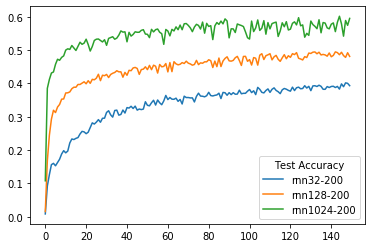

In [9]:
plt.figure()
for i, iid in enumerate(model_id):
    noniid = iid[4:] if iid[0] == "n" else iid 
    plt.plot(rds[i]['testAC'], label=noniid)
plt.legend(loc='lower right', title="Test Accuracy")
plt.show()

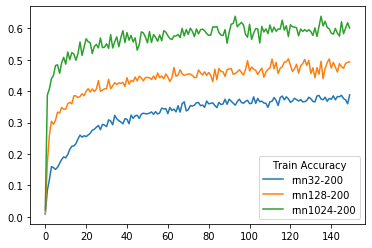

In [10]:
plt.figure()
for i, iid in enumerate(model_id):
    noniid = iid[4:] if iid[0] == "n" else iid 
    plt.plot(rds[i]['trainAC'], label=noniid)
plt.legend(loc='lower right', title="Train Accuracy")
plt.show()

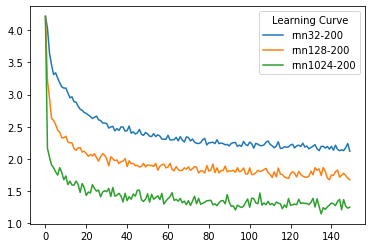

In [12]:
plt.figure()
for i, iid in enumerate(model_id):
    noniid = iid[4:] if iid[0] == "n" else iid 
    plt.plot(rds[i]['loss'], label=noniid)
plt.legend(loc='upper right', title="Learning Curve")
plt.show()

In [13]:
rec_path = "/content/gdrive/My Drive/Colab Notebooks/DL19_HW3/rec/"
model_id2 = []
model_id2.append("rnn32-200") #save as 
model_id2.append("lstm128-200")
model_id2.append("rnn1024t-200")
def rec_name(model_id):
  return"rec-"+ model_id + ".pkl"
rs2 = map(rec_name, model_id2)
rds2 = []
for r in rs2:
  with open(rec_path+r, "rb") as fo: 
    rds2.append(pickle.load(fo))
  print('Record {} loaded from disk.'.format(rec_name))

Record <function rec_name at 0x7fda90c18730> loaded from disk.
Record <function rec_name at 0x7fda90c18730> loaded from disk.
Record <function rec_name at 0x7fda90c18730> loaded from disk.


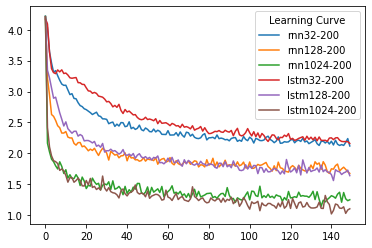

In [14]:
plt.figure()
for i, iid in enumerate(model_id):
    noniid = iid[4:] if iid[0] == "n" else iid 
    plt.plot(rds[i]['loss'], label=noniid)
plt.plot(rds2[0]['loss'], label="lstm32-200")
plt.plot(rds2[1]['loss'], label="lstm128-200")
plt.plot(rds2[2]['loss'], label="lstm1024-200")
plt.legend(loc='upper right', title="Learning Curve")
plt.show()

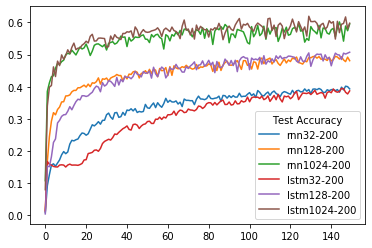

In [15]:
plt.figure()
for i, iid in enumerate(model_id):
    noniid = iid[4:] if iid[0] == "n" else iid 
    plt.plot(rds[i]['testAC'], label=noniid)
plt.plot(rds2[0]['testAC'], label="lstm32-200")
plt.plot(rds2[1]['testAC'], label="lstm128-200")
plt.plot(rds2[2]['testAC'], label="lstm1024-200")
plt.legend(loc='lower right', title="Test Accuracy")
plt.show()

Retrain lstm-32-200 for its flat may impact the validation

In [16]:
rec_path = "/content/gdrive/My Drive/Colab Notebooks/DL19_HW3/rec/"
model_id2 = []
model_id2.append("rnn32-200") #save as 
model_id2.append("lstm128-200")
model_id2.append("rnn1024t-200")
def rec_name(model_id):
  return"rec-"+ model_id + ".pkl"
rs2 = map(rec_name, model_id2)
rds2 = []
for r in rs2:
  with open(rec_path+r, "rb") as fo: 
    rds2.append(pickle.load(fo))
  print('Record {} loaded from disk.'.format(rec_name))

Record <function rec_name at 0x7fda90a06268> loaded from disk.
Record <function rec_name at 0x7fda90a06268> loaded from disk.
Record <function rec_name at 0x7fda90a06268> loaded from disk.


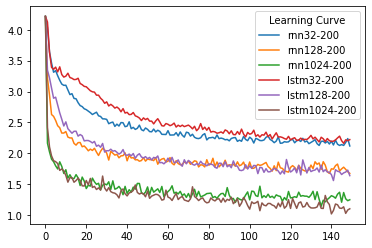

In [17]:
plt.figure()
for i, iid in enumerate(model_id):
    noniid = iid[4:] if iid[0] == "n" else iid 
    plt.plot(rds[i]['loss'], label=noniid)
plt.plot(rds2[0]['loss'], label="lstm32-200")
plt.plot(rds2[1]['loss'], label="lstm128-200")
plt.plot(rds2[2]['loss'], label="lstm1024-200")
plt.legend(loc='upper right', title="Learning Curve")
plt.show()

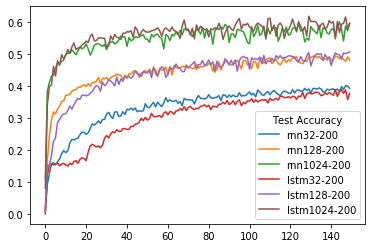

In [18]:
plt.figure()
for i, iid in enumerate(model_id):
    noniid = iid[4:] if iid[0] == "n" else iid 
    plt.plot(rds[i]['testAC'], label=noniid)
plt.plot(rds2[0]['testAC'], label="lstm32-200")
plt.plot(rds2[1]['testAC'], label="lstm128-200")
plt.plot(rds2[2]['testAC'], label="lstm1024-200")
plt.legend(loc='lower right', title="Test Accuracy")
plt.show()

In [21]:
rec_path = "/content/gdrive/My Drive/Colab Notebooks/DL19_HW3/rec/"
model_id = []
model_id.append("lstm128-10") #save as 
model_id.append("lstm128-50")
model_id.append("lstm128-150")
model_id.append("lstm128-500")
def rec_name(model_id):
  return"rec-"+ model_id + ".pkl"
rs = map(rec_name, model_id)
rds = []
for r in rs:
  with open(rec_path+r, "rb") as fo: 
    rds.append(pickle.load(fo))
  print('Record {} loaded from disk.'.format(rec_name))
model_id2 = []
model_id2.append("new-rnn128-10") #save as 
model_id2.append("new-rnn128-200")
model_id2.append("new-rnn128-500")
def rec_name(model_id):
  return"rec-"+ model_id + ".pkl"
rs2 = map(rec_name, model_id2)
rds2 = []
for r in rs2:
  with open(rec_path+r, "rb") as fo: 
    rds2.append(pickle.load(fo))
  print('Record {} loaded from disk.'.format(rec_name))

Record <function rec_name at 0x7fda90851730> loaded from disk.
Record <function rec_name at 0x7fda90851730> loaded from disk.
Record <function rec_name at 0x7fda90851730> loaded from disk.
Record <function rec_name at 0x7fda90851730> loaded from disk.
Record <function rec_name at 0x7fda90851950> loaded from disk.
Record <function rec_name at 0x7fda90851950> loaded from disk.
Record <function rec_name at 0x7fda90851950> loaded from disk.


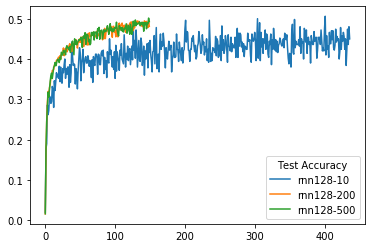

In [26]:
plt.figure()
#for i, iid in enumerate(model_id2):
#    noniid = iid[4:] if iid[0] == "n" else iid 
#    plt.plot(rds[i]['testAC'], label=noniid)
plt.plot(rds2[0]['testAC'], label="rnn128-10")
plt.plot(rds2[1]['testAC'], label="rnn128-200")
plt.plot(rds2[2]['testAC'], label="rnn128-500")
plt.legend(loc='lower right', title="Test Accuracy")
plt.show()

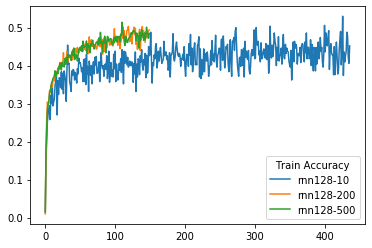

In [25]:
plt.figure()
#for i, iid in enumerate(model_id2):
#    noniid = iid[4:] if iid[0] == "n" else iid 
#    plt.plot(rds[i]['trainAC'], label=noniid)
plt.plot(rds2[0]['trainAC'], label="rnn128-10")
plt.plot(rds2[1]['trainAC'], label="rnn128-200")
plt.plot(rds2[2]['trainAC'], label="rnn128-500")
plt.legend(loc='lower right', title="Train Accuracy")
plt.show()

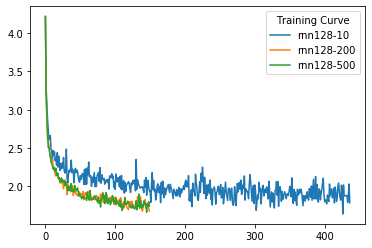

In [27]:
plt.figure()
#for i, iid in enumerate(model_id2):
#    noniid = iid[4:] if iid[0] == "n" else iid 
#    plt.plot(rds[i]['trainAC'], label=noniid)
plt.plot(rds2[0]['loss'], label="rnn128-10")
plt.plot(rds2[1]['loss'], label="rnn128-200")
plt.plot(rds2[2]['loss'], label="rnn128-500")
plt.legend(loc='upper right', title="Training Curve")
plt.show()

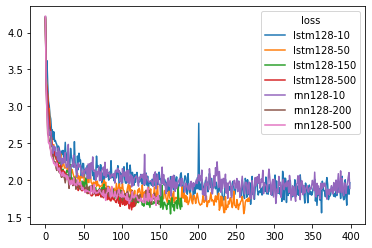

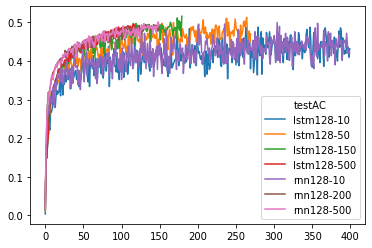

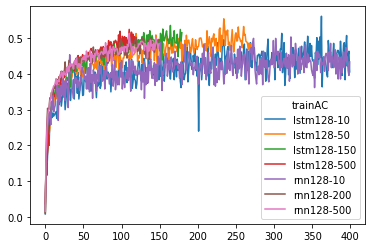

In [33]:
for val in ['loss', 'testAC', 'trainAC']:
    plt.figure()
    for i, iid in enumerate(model_id):
        noniid = iid[4:] if iid[0] == "n" else iid 
        plt.plot(rds[i][val][:400], label=noniid)
    plt.plot(rds2[0][val][:400], label="rnn128-10")
    plt.plot(rds2[1][val][:400], label="rnn128-200")
    plt.plot(rds2[2][val][:400], label="rnn128-500")
    if val == 'loss':
        plt.legend(loc='upper right', title=val)
    else:
        plt.legend(loc='lower right', title=val)
    plt.show()

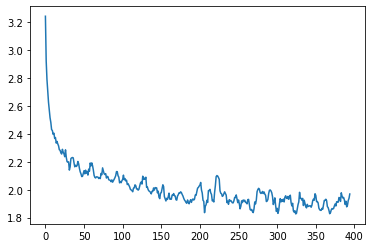

In [35]:
def intergrated(arr, l=5):
  return [sum([arr[idx+i]for i in range(l)])/l for idx in range(len(arr)-l)]
#[rds2[0]['loss'][:400][i-1]+rds2[0]['loss'][:400][i]+rds2[0]['loss'][:400][i] for i in range(399)]
plt.plot(intergrated(rds2[0]['loss'][:400]), label="rnn128-10")

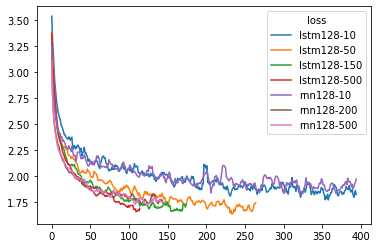

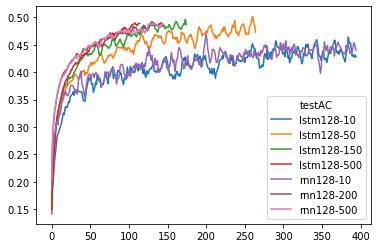

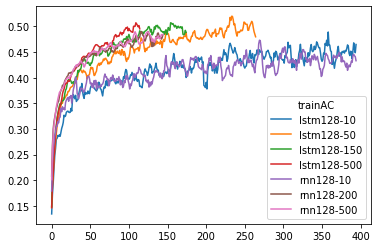

In [36]:
for val in ['loss', 'testAC', 'trainAC']:
    plt.figure()
    for i, iid in enumerate(model_id):
        noniid = iid[4:] if iid[0] == "n" else iid 
        plt.plot(intergrated(rds[i][val][:400]), label=noniid)
    plt.plot(intergrated(rds2[0][val][:400]), label="rnn128-10")
    plt.plot(intergrated(rds2[1][val][:400]), label="rnn128-200")
    plt.plot(intergrated(rds2[2][val][:400]), label="rnn128-500")
    if val == 'loss':
        plt.legend(loc='upper right', title=val)
    else:
        plt.legend(loc='lower right', title=val)
    plt.show()